# Tokenization Deep Dive with Python, PyTorch, and Huggingface

In this tutorial, we will explore the world of tokenization. Tokenization is a crucial step in the Natural Language Processing (NLP) pipeline. It's the process of converting a sequence of characters in a text into a sequence of tokens.

## Table of Contents:

1. What is Tokenization?
2. Word-based vs. Subword-based Tokenization
3. Implementing Tokenization with Huggingface
4. Visualizing Tokenization

## 1. What is Tokenization?
**Tokenization** is the process of splitting a piece of text into smaller units called tokens. These tokens can be as small as characters or as long as words. The main objective is to convert raw text into a format that's easier for NLP models to understand.

## 2. Word-based vs. Subword-based Tokenization
There are two primary ways to tokenize:

*   **Word-based Tokenization:** Splits text into words. This can be challenging for languages that don't use spaces.

*   **Subword-based Tokenization:** Splits text into subword units. It can help models understand morphemes or word parts.

Tokenization isn't just about splitting a text; it's about understanding the structure, meaning, and nuances of a language. This understanding is essential for models that interpret or generate language. Let's explore the primary ways of tokenization.

### 2.1 Word-based Tokenization

**Concept:** Word-based tokenization is one of the most intuitive forms. As the name suggests, it involves breaking down text into individual words. This method seems straightforward for languages like English, where spaces often delineate words. However, not all languages use spaces in the same way. For instance, in Chinese, words are composed of characters without spaces in between. Therefore, relying solely on spaces can be inadequate.

**Pros:**

*   Easy to implement, especially for languages that use spaces.
*   The output is human-readable, which makes it easier for debugging and inspection.

**Cons:**

*   Can't handle languages that don't use spaces consistently to separate words.
*   Inflexible with respect to out-of-vocabulary (OOV) words. If a word hasn't been seen before, the model might struggle with it.


### 2.2 Subword-based Tokenization
**Concept:** Subword tokenization goes a level deeper than word-based tokenization. Instead of using whole words as the smallest unit, it breaks down words further into smaller, often recurring, pieces or chunks. For instance, the word "unhappiness" can be broken down into "un", "happi", and "ness". This kind of tokenization is useful for understanding morphemes - the smallest meaningful units in a language.

**Types:**



*   **Byte-Pair Encoding (BPE):**  It's a form of subword tokenization. BPE works by iteratively merging frequent pairs of characters.
*   **WordPiece:**  Used in models like BERT, it's similar to BPE but, instead of merging frequent pairs, it splits words into pieces.
*   **SentencePiece:**  A data-driven, unsupervised text tokenizer and detokenizer mainly for Neural Network-based text generation tasks.


**Pros:**

* Efficient in handling OOV words. Since words are broken down, even if the exact word hasn't been seen before, its parts might have been.
* Can be more memory efficient because it reduces the vocabulary size. Instead of storing all forms of a word (like "happy", "happier", "happiest"), storing the parts ("happi", "er", "est") might suffice.

**Cons:**

* The output might not be as human-readable. This can make debugging or manual inspection slightly challenging.
* Requires more sophisticated algorithms than simple space-based splits.

Let's see the difference in Python:

In [1]:
text = "Tokenization is fun!"

# Word-based Tokenization
word_tokens = text.split()
print(f"Word tokens: {word_tokens}")

# A simple subword-based tokenization (this is just an example and not a real implementation)
subword_tokens = [text[i:i+3] for i in range(0, len(text), 3)]
print(f"Subword tokens: {subword_tokens}")

Word tokens: ['Tokenization', 'is', 'fun!']
Subword tokens: ['Tok', 'eni', 'zat', 'ion', ' is', ' fu', 'n!']


## 3. Implementing Tokenization with Huggingface
The Huggingface library provides a straightforward way to implement both word and subword tokenization.

First, let's install the required packages.

In [3]:
!pip install -q transformers torch

### BERT and Tokenization

BERT (Bidirectional Encoder Representations from Transformers) is a transformer-based model designed to understand the context of words in a sentence. For BERT, and models like it, understanding a word often means understanding the words to its left and right.

#### Why is Tokenization Important for BERT?
For BERT to process and understand text data:

1. The model needs to convert words (or subwords) into numerical values. Just as humans understand words and their meanings, models understand numbers.

2. Texts of different lengths need to be standardized. BERT processes data in batches. Therefore, every piece of text in a batch needs to be of the same length, which brings us to the concept of padding and attention masks.

### Diving Deeper into the Tokenization Process

1. **Token Splitting:** The raw text is split into tokens. Depending on the tokenizer, these tokens can be whole words or subwords. BERT often uses subword tokenization because it can efficiently handle rare words or words not in its vocabulary.

2. **Tokens to IDs:** Every token is then mapped to a unique ID from BERT's vocabulary. These IDs are what the model will eventually process. The tokenizer has a pre-defined vocabulary that it references for this conversion.

3. **Padding:** Since BERT processes text in batches, each sequence needs to be of the same length. Shorter sequences are "padded" with extra tokens (often 0 values) to match the length of the longest sequence in the batch.

4. **Attention Masks:** While padding ensures consistency in sequence length, the model needs to know which tokens are genuine and which ones are just padding. This distinction is crucial because the model shouldn't process padding tokens. The attention mask serves this purpose. For every token in the input, the mask has a value of 1 if it's a genuine token and 0 if it's padding.

### Tokenization with Huggingface's Transformers Library
Huggingface's Transformers library simplifies the process of tokenization (and many other NLP tasks) by providing pre-trained tokenizers and models.

1. **Pre-trained Tokenizers:** Tokenizers that are already trained and optimized for specific models. In the example provided, the tokenizer is fine-tuned for the "bert-base-uncased" version of BERT. This tokenizer knows BERT's vocabulary, the preferred subword tokenization method, and other nuances.

2. **Efficiency and Compatibility:** By using these pre-trained tokenizers, you ensure that your text is tokenized in a manner compatible with the corresponding pre-trained model. This compatibility is essential for transfer learning, where you might fine-tune a pre-trained model on a specific task.

Let's start tokenizing:

In [4]:
# This line imports the BertTokenizer class from the transformers library.
# BertTokenizer is designed specifically for tokenizing text in a
# manner suitable for the BERT model.
from transformers import BertTokenizer

# Initializing a tokenizer
# BertTokenizer.from_pretrained("bert-base-uncased"): The from_pretrained() method is a class method provided
# by many classes in the transformers library. It allows you to initialize an object (in this case, a tokenizer)
# using a pre-trained version available in the Huggingface model hub.

# "bert-base-uncased": This is the identifier for one of the pre-trained versions of BERT.
# Specifically, it refers to the "base" version (as opposed to the "large" version) that
# doesn't differentiate between uppercase and lowercase letters (hence "uncased").
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenizing a text
# The variable text simply holds a string that we want to tokenize.
# tokenizer(text, return_tensors='pt'): This line tokenizes the text. Let's break down what happens here:
# tokenizer(text): The tokenizer converts the string text into a format suitable for BERT.
# This includes splitting the text into tokens, converting tokens to their respective
# IDs (each token has a unique ID in BERT's vocabulary), and creating additional tensors
# necessary for BERT, like the attention mask.
# return_tensors='pt': This argument specifies the desired format for the returned data.
# 'pt' stands for PyTorch tensors. If you were working with TensorFlow
# instead of PyTorch, you'd use 'tf'.
text = "Tokenization with Huggingface is even more fun!"
encoded_input = tokenizer(text, return_tensors='pt')

print(encoded_input)

{'input_ids': tensor([[  101, 19204,  3989,  2007, 17662, 12172,  2003,  2130,  2062,  4569,
           999,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


## 4. Visualizing Tokenization
It's useful to visualize how tokenization works to understand the underlying tokens better.

Here, the encoded_input will have both token IDs (which represent each token) and attention masks (used for variable-length sequences).

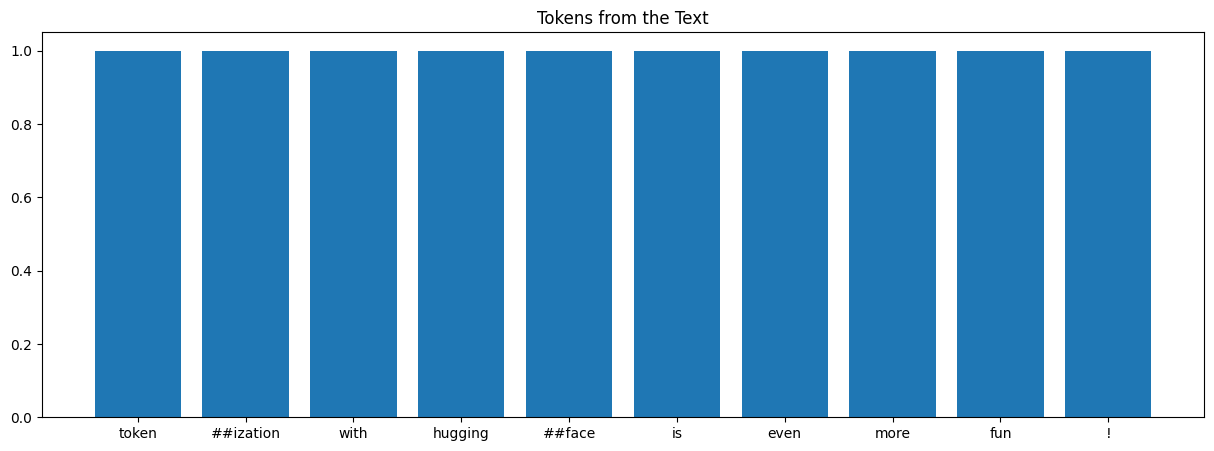

In [5]:
import matplotlib.pyplot as plt

tokens = tokenizer.tokenize(text)

# Visualizing tokens
plt.figure(figsize=(15,5))
plt.bar(tokens, [1]*len(tokens))
plt.title("Tokens from the Text")
plt.show()


This will display a bar chart where each bar represents a token.

-------------------

Now, let's put everything together to run the code from start to finish.